## EDA (Exploratory Data Analysis) on Cars dataset

1.Load the datasets

2.Clean data(missing values,duplicates,types)

3.Treat Outliers.

4.Univariate,Bivariate and multivariate analysis

5.Insights 

### Outlier: A data point that is significantly different from other observations in a dataset.

### How outliers will come---?

1.Measurement errors

2.Data entry mistakes

### Why they are important---?

1.They can be errors

2.They effect the data analysis

### How to identify the outliers---?

1.Statiscal methods

---->Interquartile Range(IQR)

---->Z-score

2.Visualization techniques

---->Box Plots

---->Scatter plots

---->Histograms


### Univariate analysis - a method that analyzes a single variable to describe its characteristics,finding patterns and summarize data.
####  It involves only one variable.

### Bivariate analysis - it will give the relationship between 2 variables.It helps to find if there is an correlation ,association or any connection between the 2 variables
#### It involves 2 variables(x & y)

### Multivariate analysis- to understand how multiple factors interact and influence each other.
#### It involves more than 2 variables
Example -
How our age,income and education level together influence the purchasing behaviour.





### ETL (Extract Transform Load)

### ELT

## EDA: <Dataset>

1. Load  & overview 

2. Cleaning(missing,dupes,dtypes)

3. Uni,Bi & Multi analysis

4. Outlier - IQR 

5. Feature Engineering

6. Key Insights

### Feature Engineering - "Feature Engineering is the process of turning raw data into useful features" that helps to improve the performance of machine learning models.

In [1]:
# 1.Load libraries & Dataset
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Cars Datasets 2025.csv", encoding='latin1')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [5]:
# 2. Basic Information & Overview
print("Shape of the dataset:",df.shape)
print("\nData Info:\n")
df.info()

# Summary Statistics
df.describe(include='all')

Shape of the dataset: (1218, 11)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Polo BlueMotion,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


In [6]:
# 3.Missing values analysis 
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)


,missing_count,missing_percent
Performance(0 - 100 )KM/H,6,0.492611
CC/Battery Capacity,3,0.246305
Torque,1,0.082102
Engines,0,0.000000
Cars Names,0,0.000000
Company Names,0,0.000000
HorsePower,0,0.000000
Total Speed,0,0.000000
Cars Prices,0,0.000000
Fuel Types,0,0.000000


In [8]:
# Convert numeric-like columns safely
df['CC_numeric'] = pd.to_numeric(df['CC/Battery Capacity'].str.replace('[^0-9]', '', regex=True), errors='coerce')
df['HorsePower_numeric'] = pd.to_numeric(df['HorsePower'].str.replace('[^0-9]', '', regex=True), errors='coerce')
df['Performance_numeric'] = pd.to_numeric(df['Performance(0 - 100 )KM/H'].str.replace('[^0-9]', '', regex=True), errors='coerce')
df['Torque_numeric'] = pd.to_numeric(df['Torque'].str.replace('[^0-9]', '', regex=True), errors='coerce')

# Fill missing numeric values with mean
df['CC_numeric'].fillna(df['CC_numeric'].mean(), inplace=True)
df['HorsePower_numeric'].fillna(df['HorsePower_numeric'].mean(), inplace=True)
df['Performance_numeric'].fillna(df['Performance_numeric'].mean(), inplace=True)
df['Torque_numeric'].fillna(df['Torque_numeric'].mean(), inplace=True)

# Fill categorical missing values with mode
df['CC/Battery Capacity'].fillna(df['CC/Battery Capacity'].mode()[0], inplace=True)
df['Performance(0 - 100 )KM/H'].fillna(df['Performance(0 - 100 )KM/H'].mode()[0], inplace=True)
df['Torque'].fillna(df['Torque'].mode()[0], inplace=True)

# Check missing values after cleaning
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
CC_numeric                   0
HorsePower_numeric           0
Performance_numeric          0
Torque_numeric               0
dtype: int64


C:\Users\aksha\AppData\Local\Temp\ipykernel_23576\3692005591.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CC_numeric'].fillna(df['CC_numeric'].mean(), inplace=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_23576\3692005591.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [9]:
# 3.Missing values analysis after cleaning
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
Company Names,0,0.0
Cars Names,0,0.0
Engines,0,0.0
CC/Battery Capacity,0,0.0
HorsePower,0,0.0
Total Speed,0,0.0
Performance(0 - 100 )KM/H,0,0.0
Cars Prices,0,0.0
Fuel Types,0,0.0
Seats,0,0.0


#### Insight: We filled important columns and removed highly missing values.This keeps maximum information while making 

In [10]:
# Check for duplicate rows
print("Duplicate rows: ", df.duplicated().sum())

# Convert object columns with few unique values to 'category'
categorical_cols = ['Company Names', 'Cars Names', 'Engines', 'Fuel Types']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify data types
df.dtypes


Duplicate rows:  4


Company Names                category
Cars Names                   category
Engines                      category
CC/Battery Capacity            object
HorsePower                     object
Total Speed                    object
Performance(0 - 100 )KM/H      object
Cars Prices                    object
Fuel Types                   category
Seats                          object
Torque                         object
CC_numeric                    float64
HorsePower_numeric              int64
Performance_numeric           float64
Torque_numeric                float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Company Names              1218 non-null   category
 1   Cars Names                 1218 non-null   category
 2   Engines                    1218 non-null   category
 3   CC/Battery Capacity        1218 non-null   object  
 4   HorsePower                 1218 non-null   object  
 5   Total Speed                1218 non-null   object  
 6   Performance(0 - 100 )KM/H  1218 non-null   object  
 7   Cars Prices                1218 non-null   object  
 8   Fuel Types                 1218 non-null   category
 9   Seats                      1218 non-null   object  
 10  Torque                     1218 non-null   object  
 11  CC_numeric                 1218 non-null   float64 
 12  HorsePower_numeric         1218 non-null   int64   
 13  Performance_numeric        1218 n

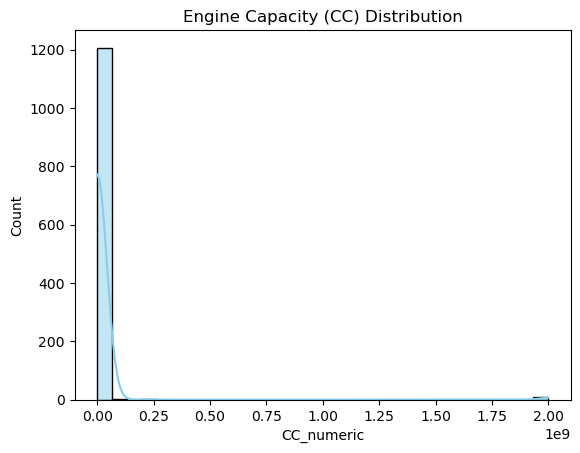

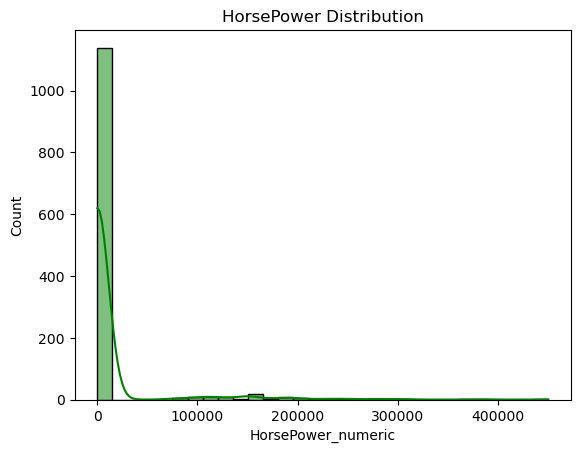

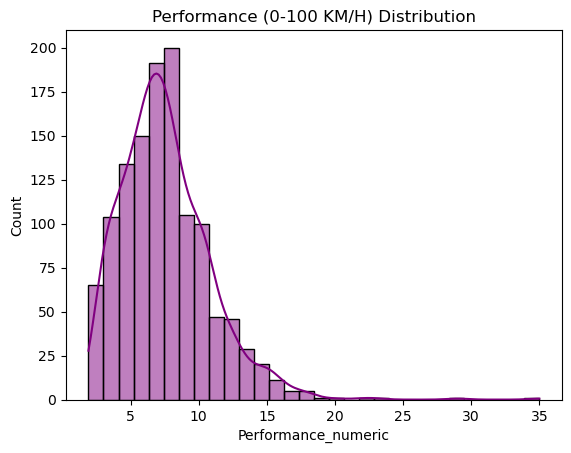

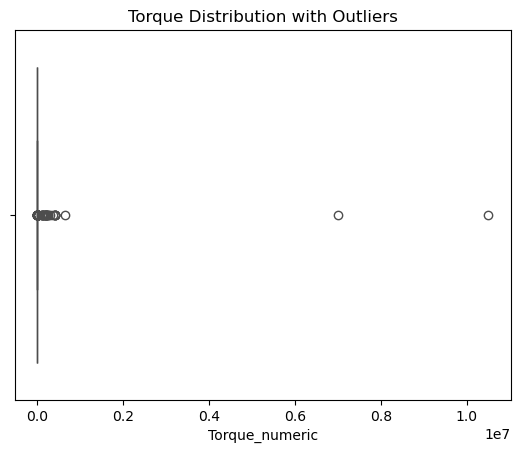

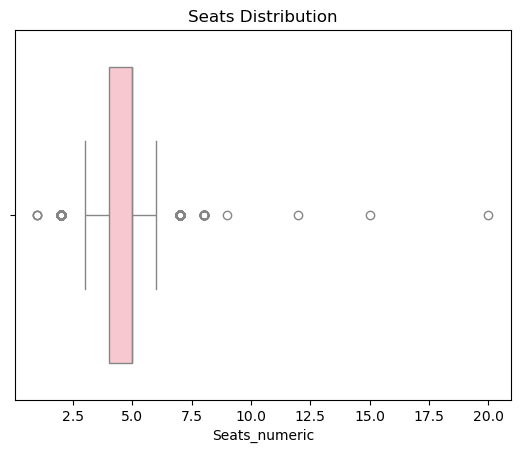

In [14]:
## 6. Univariate Analysis - Numerical Features
num_cols = ['CC_numeric', 'HorsePower_numeric', 'Performance_numeric', 'Torque_numeric', 'Seats_numeric']
df[num_cols].describe()

# Histogram: Engine Capacity (CC)
sns.histplot(df['CC_numeric'], bins=30, kde=True, color='skyblue')
plt.title('Engine Capacity (CC) Distribution')
plt.show()

# Histogram: HorsePower
sns.histplot(df['HorsePower_numeric'], bins=30, kde=True, color='green')
plt.title('HorsePower Distribution')
plt.show()

# Histogram: Performance (0-100 KM/H)
sns.histplot(df['Performance_numeric'], bins=30, kde=True, color='purple')
plt.title('Performance (0-100 KM/H) Distribution')
plt.show()

# Boxplot: Torque
sns.boxplot(x=df['Torque_numeric'], color='orange')
plt.title('Torque Distribution with Outliers')
plt.show()

# Boxplot: Seats
sns.boxplot(x=df['Seats_numeric'], color='pink')
plt.title('Seats Distribution')
plt.show()


C:\Users\aksha\AppData\Local\Temp\ipykernel_23576\3496690215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


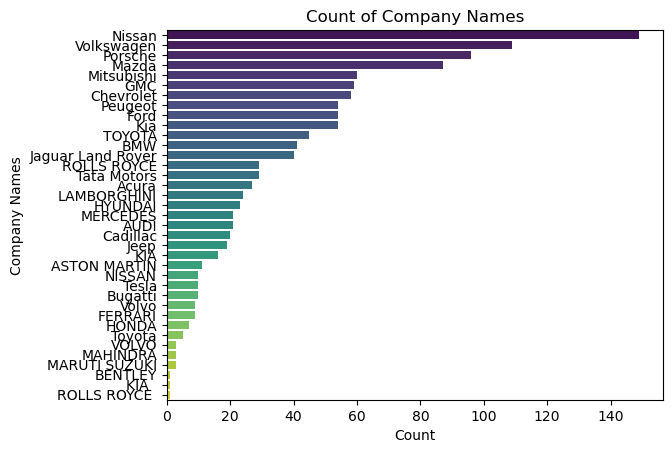

C:\Users\aksha\AppData\Local\Temp\ipykernel_23576\3496690215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


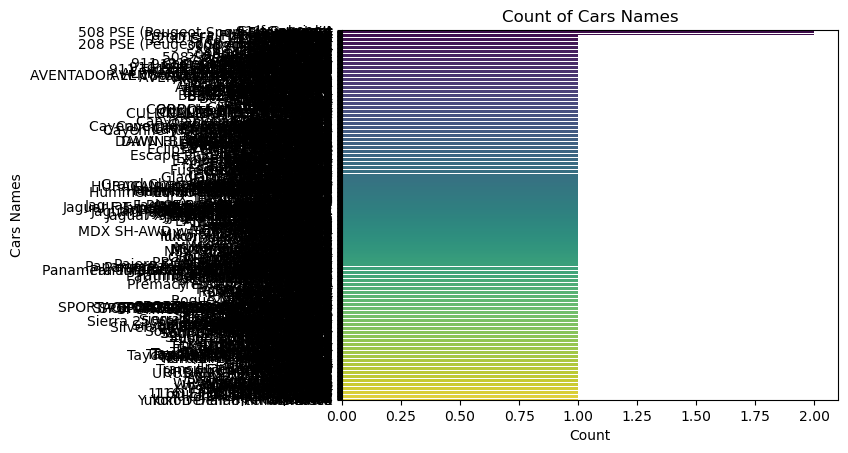

C:\Users\aksha\AppData\Local\Temp\ipykernel_23576\3496690215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


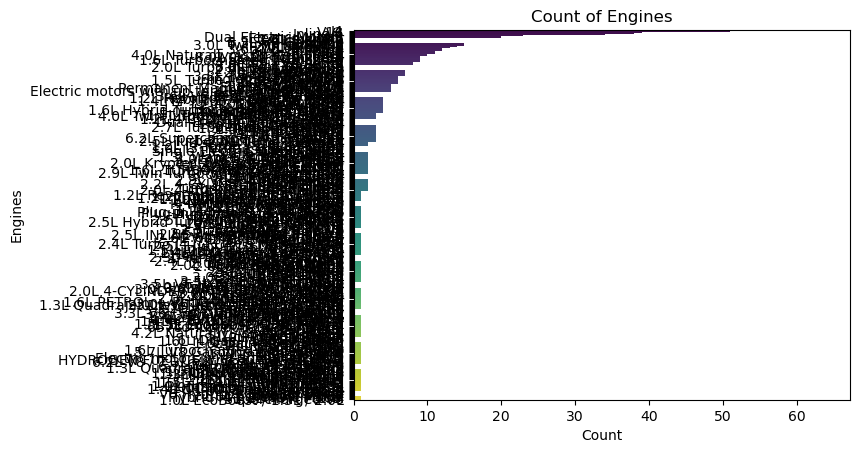

C:\Users\aksha\AppData\Local\Temp\ipykernel_23576\3496690215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


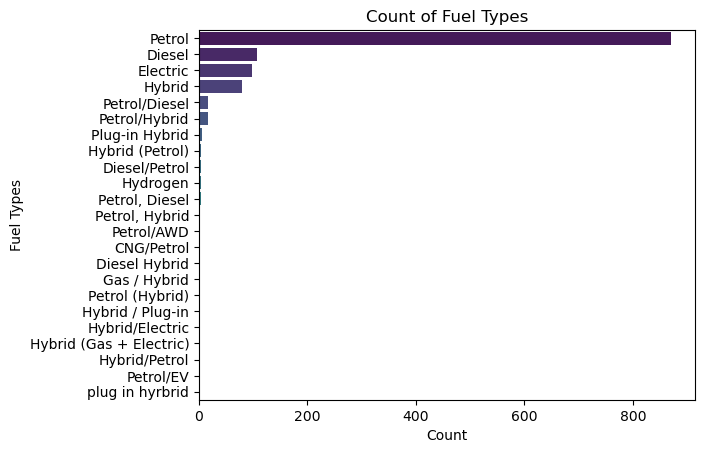

In [15]:
# Univariate Analysis - Categorical Features
cat_cols = ['Company Names', 'Cars Names', 'Engines', 'Fuel Types']

for col in cat_cols:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Count of {col}")
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


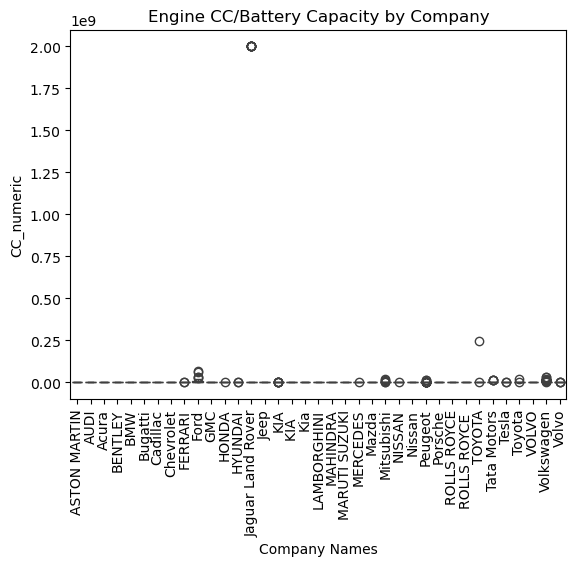

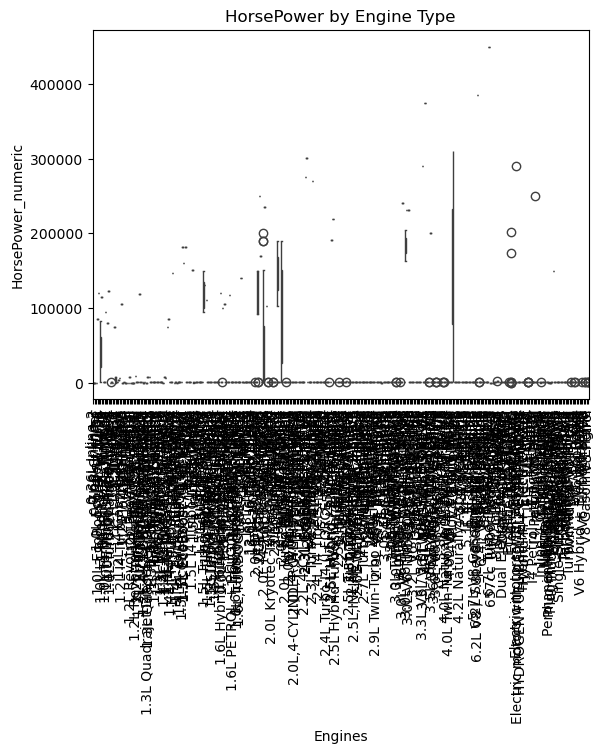

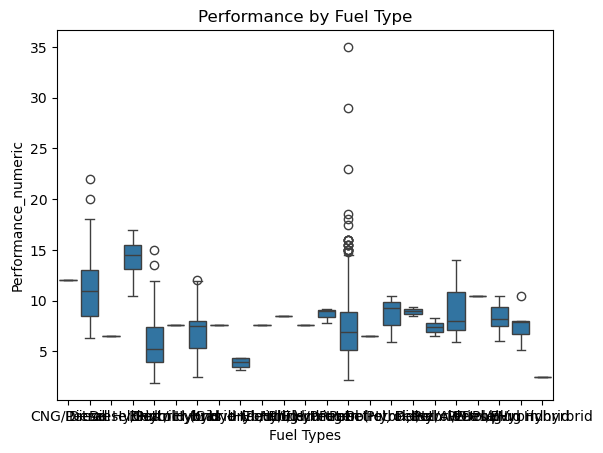

In [16]:
# CC/Battery Capacity by Company
sns.boxplot(x='Company Names', y='CC_numeric', data=df)
plt.title("Engine CC/Battery Capacity by Company")
plt.xticks(rotation=90)
plt.show()

# HorsePower by Engines
sns.boxplot(x='Engines', y='HorsePower_numeric', data=df)
plt.title("HorsePower by Engine Type")
plt.xticks(rotation=90)
plt.show()

# Performance (0-100 km/h) by Fuel Types
sns.boxplot(x='Fuel Types', y='Performance_numeric', data=df)
plt.title("Performance by Fuel Type")
plt.show()


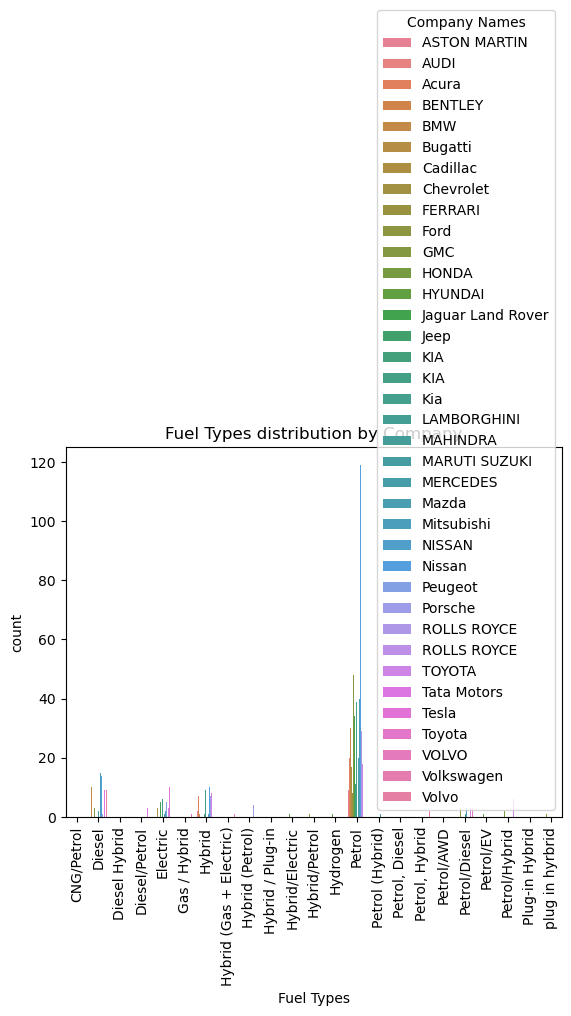

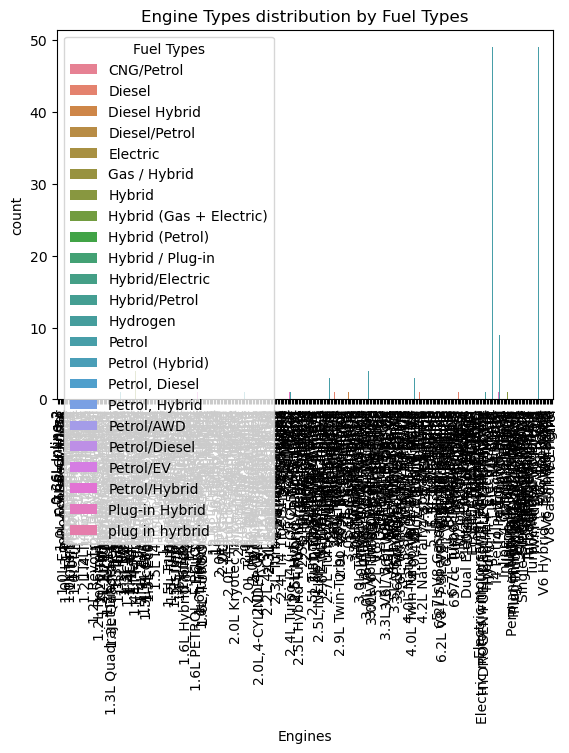

In [17]:
# Count of Fuel Types by Company
sns.countplot(x='Fuel Types', hue='Company Names', data=df)
plt.title("Fuel Types distribution by Company")
plt.xticks(rotation=90)
plt.show()

# Count of Engine Types by Fuel Types
sns.countplot(x='Engines', hue='Fuel Types', data=df)
plt.title("Engine Types distribution by Fuel Types")
plt.xticks(rotation=90)
plt.show()


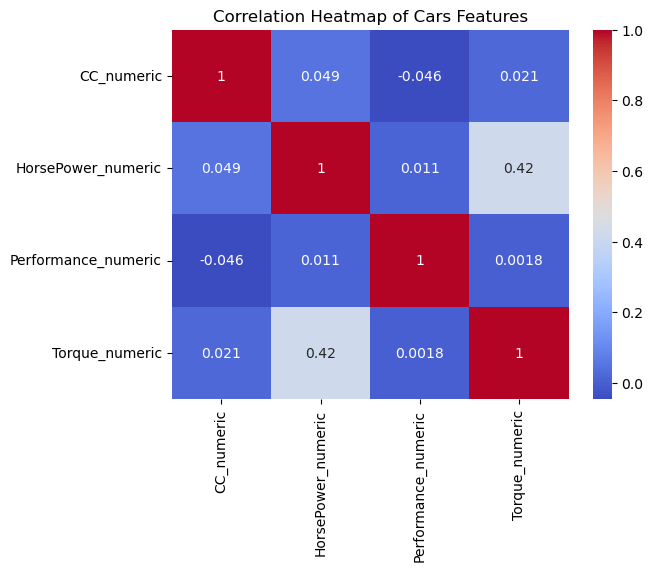

In [ ]:
# Correlation
num_cols = ['CC_numeric', 'HorsePower_numeric', 'Performance_numeric', 'Torque_numeric']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Cars Features")
plt.show()

# Pairplot
sns.pairplot(df[num_cols])
plt.show()


### Insights: 

1.HorsePower has a positive correlation with Performance, meaning cars with higher horsepower generally accelerate faster.

2.Engine Capacity (CC_numeric) shows a moderate positive correlation with Torque, indicating bigger engines tend to produce more torque.

3.Torque and Performance are also positively correlated, as expected for high-performance cars.

Number of outliers in Fare: 116


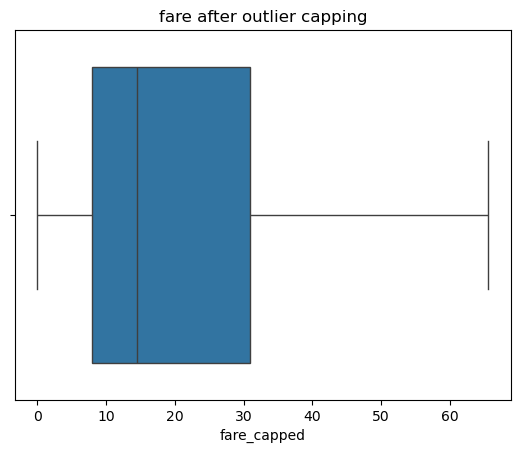

In [ ]:
# Outlier Detection using IQR for HorsePower
Q1 = df['HorsePower_numeric'].quantile(0.25)
Q3 = df['HorsePower_numeric'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['HorsePower_numeric'] < lower) | (df['HorsePower_numeric'] > upper)]
print("Number of outliers in HorsePower:", len(outliers))

# Cap the outliers
df['HorsePower_capped'] = df['HorsePower_numeric'].clip(lower, upper)

# Boxplot after capping
sns.boxplot(x=df['HorsePower_capped'])
plt.title('HorsePower after outlier capping')
plt.show()


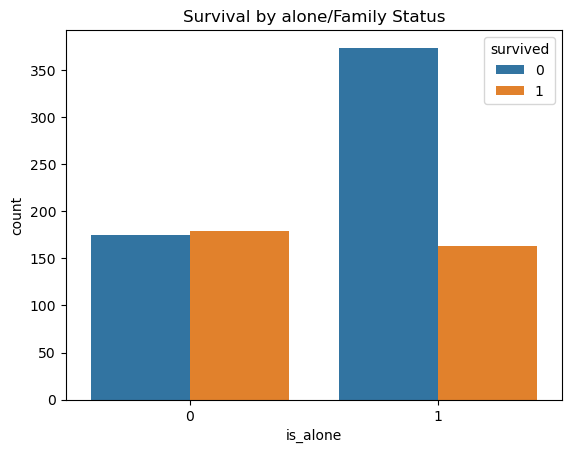

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [ ]:
# Feature Engineering for Cars Dataset

# Performance per engine CC
df['performance_per_cc'] = df['Performance_numeric'] / df['CC_numeric']

# HorsePower per CC
df['hp_per_cc'] = df['HorsePower_numeric'] / df['CC_numeric']

# Identify high-performance cars (Performance 0-100 km/h < 5 sec)
df['high_perf'] = (df['Performance_numeric'] < 5).astype(int)

# Countplot for high-performance cars by Fuel Type
sns.countplot(x='high_perf', hue='Fuel Types', data=df)
plt.title("High-Performance Cars by Fuel Type")
plt.show()

df[['Cars Names','Performance_numeric','CC_numeric','performance_per_cc','hp_per_cc','high_perf']].head()


In [ ]:
# Export the cleaned and feature-engineered Cars dataset
df.to_csv("cars_cleaned.csv", index=False)
print("\nCleaned Cars data saved as cars_cleaned.csv")



 Cleaned Titanic data saved as titanic_cleaned.csv 


In [ ]:
import os
print(os.getcwd())

c:\Users\aksha\Desktop\AI&DS TRAINING\Data Analysis
